# Regression Model with Decision Tree
- EDA
- Data Processing
- Linear Regression
- MLP
- K-fold Cross Validation
- Decision Tree
- Ensemble
  > Random Forest
  > Boosting
- House Prices : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

## EDA
- House Prices in Kaggle

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("train.csv")

In [4]:
len(df_train)

1460

### Dataset 확인

- 최종 목표 : price 맞추기

In [5]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


feature, 여기서는 columns 들은 숫자와 문자들이 섞여있는 형태

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
len(df_train.columns)

81

id : 숫자, saleprice : 최종 목표 이므로 실제 필요한 건 columns[1:80]

숫자형 범주와 텍스트형 범주를 분류할 필요가 있음

In [8]:
for f in df_train.columns:
  print(f)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


columns들의 데이터 타입 확인
> - 텍스트 타입 -> object
- numeric -> int64, float64

In [9]:
for f in df_train.columns:
  print(df_train.dtypes[f])

int64
int64
object
float64
int64
object
object
object
object
object
object
object
object
object
object
object
object
int64
int64
int64
int64
object
object
object
object
object
float64
object
object
object
object
object
object
object
int64
object
int64
int64
int64
object
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
int64
object
int64
object
object
float64
object
int64
int64
object
object
object
int64
int64
int64
int64
int64
int64
object
object
object
int64
int64
int64
object
object
int64


- object가 아닌 것, 즉 numeric들만 모아본다

In [10]:
numeric = [
    f for f in df_train.columns if df_train.dtypes[f] != 'object'
] # numeric type

In [11]:
numeric

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

필요 없는 column 삭제: remove

In [12]:
numeric.remove('Id')
numeric.remove('SalePrice')

같은 방식으로 텍스트형인 categorical 분류해준다

In [13]:
categorical = [
    f for f in df_train.columns if df_train.dtypes[f]== 'object'
]

In [14]:
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [15]:
len(numeric) + len(categorical) + 2 # remove 된 2개 포함 81개

81

### Label확인
- 우리의 최종 목표
- target 값

In [16]:
df_train['SalePrice'].describe()
# describe : 우리가 궁금해하는 정보들을 알려줌
# 비정상적인 값이 있을 경우 확인하는 용도로 쓸 수 있음.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


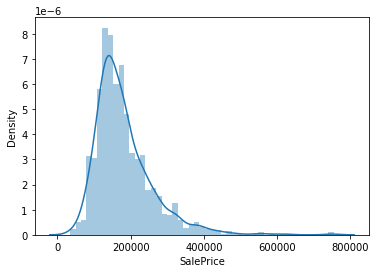

In [17]:
# histogram
sns.distplot(df_train['SalePrice']);

### Label과 Feature들 간 상관관계 파악하기

#### 1) numeric

예)
GrLivArea : Above grade (ground) living area square feet
) GrLivArea와 SalePrice의 상관관계 있는지 확인해보자

In [18]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

data

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


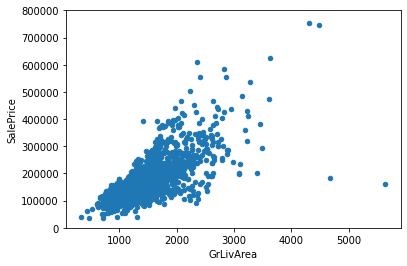

In [19]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

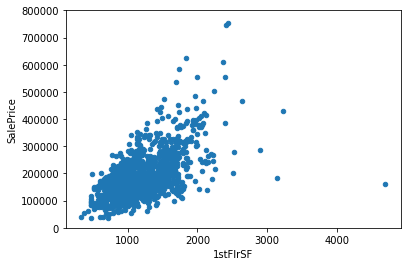

In [20]:
# 1층 넓이와 price의 상관관계
var = '1stFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

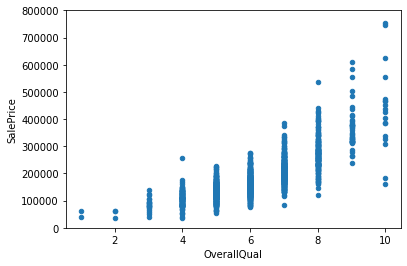

In [21]:
# 전반적인 퀄리티와 price의 상관관계
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

#### 2) Categorical

예) Neighborhood와 saleprice의 상관관계

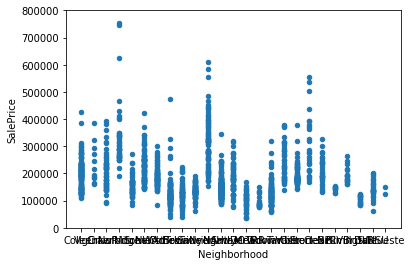

In [22]:
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

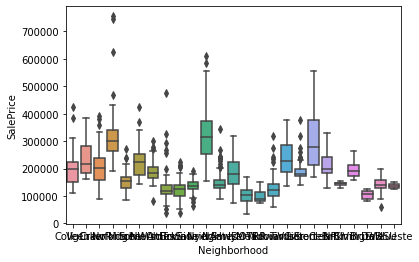

In [23]:
sns.boxplot(x=var, y='SalePrice', data=data)

#### 전체적으로 파악하려면 어떻게 해야 하는가?

In [24]:
# correlation : 상관분석
df_train['GrLivArea'].corr(df_train['SalePrice'])
# 이런 식으로 상관 관계 일일히 구할 수 있고

0.7086244776126523

In [25]:
# 데이터프레임 자체를 변수로 만들어서 직접 적용시켜줄 수 있다. 
corrmat = df_train.corr()

In [26]:
# correlation 을 적용하면 기본적으로 numeric한 feature들만 취합해서 계산해줌.
# text형은 배제됨.
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


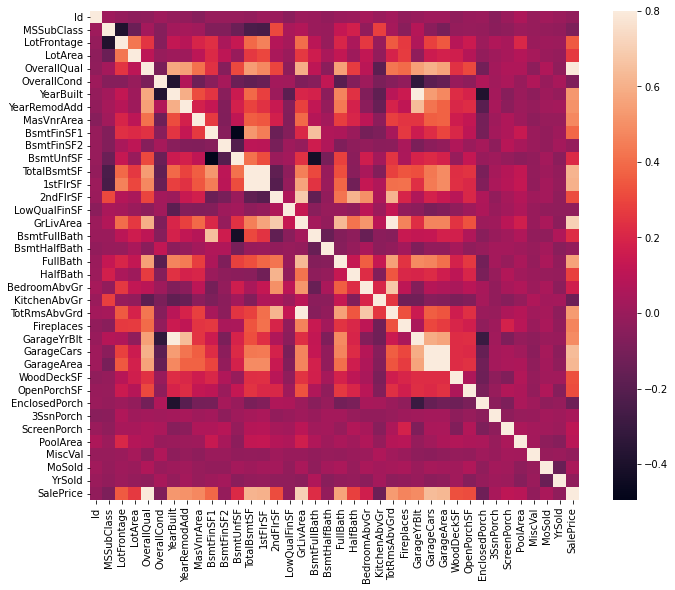

In [27]:
# 시각화 : heatmap 사용
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [28]:
corrmat['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [29]:
# 상관관계가 높은 순서대로 sorting, 기준은 SalePrice
#corrmat.sort_values(by=['SalePrice'])['SalePrice']

In [30]:
# 1) SalePrice 기준으로 정리
corrmat.sort_values(by=['SalePrice'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
KitchenAbvGr,0.002951,0.281721,-0.006069,-0.017784,-0.183882,-0.087001,-0.174800,-0.149598,-0.037610,-0.081007,...,-0.090130,-0.070091,0.037312,-0.024600,-0.051613,-0.014525,0.062341,0.026589,0.031687,-0.135907
EnclosedPorch,0.002889,-0.012037,0.010700,-0.018340,-0.113937,0.070356,-0.387268,-0.193919,-0.110204,-0.102303,...,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YrSold,0.000712,-0.021407,0.007450,-0.014261,-0.027347,0.043950,-0.013618,0.035743,-0.008201,0.014359,...,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
LowQualFinSF,-0.044230,0.046474,0.038469,0.004779,-0.030429,0.025494,-0.183784,-0.062419,-0.069071,-0.064503,...,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.022174,-0.028921,-0.025606
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MiscVal,-0.006242,-0.007683,0.003368,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,0.003571,...,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
BsmtHalfBath,-0.020155,-0.002333,-0.007234,0.048046,-0.040150,0.117821,-0.038162,-0.012337,0.026673,0.067418,...,0.040161,-0.025324,-0.008555,0.035114,0.032121,0.020025,-0.007367,0.032873,-0.046524,-0.016844
BsmtFinSF2,-0.005968,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [31]:
# 2) Sorting 된 corrmat을 SalePrice column만 보겠음
corrmat.sort_values(by=['SalePrice'])['SalePrice']

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

Categorical은 아직 특별히 손대지 않았지만 충분히 점수화 시킬 수 있는 항목들이 존재함

## Data Processing

### TODO:
1. Categorical data
2. Missing Data
3. Chage distribution of the label

### Missing Data

In [32]:
# isnull : 값이 none인 경우 True 반환
df_train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [33]:
df_missing = df_train.isnull().sum()
df_missing

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [34]:
df_missing = df_missing.sort_values(ascending=False) #sorting
df_missing

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

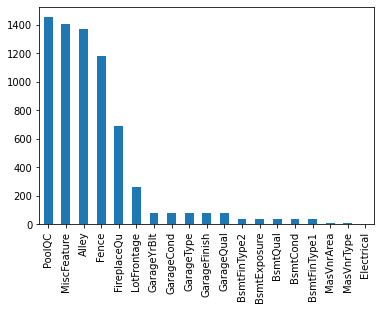

In [35]:
# missing data > 0인, 즉 하나라도 존재하는 데이터 를 그래프로 나타내자
df_missing[df_missing > 0].plot.bar()

In [36]:
# 지금은 연습이므로 dataset에서 none이 하나라도 있으면 column 전체를 제거하여 처리를 하기로 함.
# missing data 적으면 골라서 보정 해주는 것이 실제로는 더 좋음
df_missing = df_missing[df_missing>0]

In [37]:
len(df_missing)

19

In [38]:
df_missing.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [39]:
# tolist(): index가 list형으로 바뀌게 됨
df_missing.index.tolist()

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [40]:
# missing data가 있는  feature 제거
# drop(column index, num)
# num=0 -> row 삭제
# num=1 -> coulmn 삭제
df_train = df_train.drop(df_missing.index.tolist(), axis=1)

In [41]:
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [42]:
# missing data가 있는지 재확인
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

In [43]:
df_train.isnull().sum().max()

0

In [44]:
numeric = [ # 숫자형
    f for f in df_train.columns if df_train.dtypes[f] != 'object'
]

categorical = [ # 분류형
    f for f in df_train.columns if df_train.dtypes[f] == 'object'
]

In [45]:
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [46]:
numeric

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [47]:
numeric.remove('Id')
numeric.remove('SalePrice')
numeric

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

### Categorical Data

- Categorical data를 가공하기 위해 일단 범주 별로 집값이랑 어떤 상관관계가 있는지 알아보자

In [48]:
# 빈 데이터프레임 하나 만들어 줌
df_order = pd.DataFrame()

In [49]:
# 예) ExterQual
feature_name = 'ExterQual'

In [50]:
df_train[feature_name]

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: object

In [51]:
# unique : 범주 한개씩만 나오도록
df_order['val'] = df_train[feature_name].unique()

In [52]:
df_order

,val
0,Gd
1,TA
2,Ex
3,Fa


In [53]:
# class name 을 index로 치환해준다.
df_order.index = df_order.val

In [54]:
df_order

,val
val,
Gd,Gd
TA,TA
Ex,Ex
Fa,Fa


In [55]:
# 각 index 에 해당하는 sale price의 유의미한 값을 추축하고 싶다
# 예를 들면 평균 같은 값
df_train[[feature_name, 'SalePrice']]

,ExterQual,SalePrice
0,Gd,208500
1,TA,181500
2,Gd,223500
3,TA,140000
4,Gd,250000
...,...,...
1455,TA,175000
1456,TA,210000
1457,Ex,266500
1458,TA,142125


In [56]:
# ExterQual로 group화를 해서 계산해줘야 함
# mean : 평균
df_order['mean_price'] = df_train[[feature_name, 'SalePrice']].groupby(feature_name).mean()['SalePrice']

In [57]:
# 각 grade별 평균치 나옴
df_order

,val,mean_price
val,,
Gd,Gd,231633.510246
TA,TA,144341.313466
Ex,Ex,367360.961538
Fa,Fa,87985.214286


In [58]:
# sorting
df_order = df_order.sort_values('mean_price')

df_order

,val,mean_price
val,,
Fa,Fa,87985.214286
TA,TA,144341.313466
Gd,Gd,231633.510246
Ex,Ex,367360.961538


In [59]:
# sorting 된 순서대로 점수를 부여
df_order['rank'] = range(1, len(df_order)+1)

df_order

,val,mean_price,rank
val,,,
Fa,Fa,87985.214286,1
TA,TA,144341.313466,2
Gd,Gd,231633.510246,3
Ex,Ex,367360.961538,4


In [60]:
# dictionary 만들어주자
df_order = df_order['rank'].to_dict()

In [61]:
df_order

{'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

In [62]:
df_train[[feature_name]]

,ExterQual
0,Gd
1,TA
2,Gd
3,TA
4,Gd
...,...
1455,TA
1456,TA
1457,Ex
1458,TA


In [63]:
# df_train에 text형 대신 숫자로 바꿔줘야 함
# 원본 데이터는 웬만하면 훼손하지 말고 추가하는 방식으로 데이터를 삽입하자
# apply : 함수를 호출해 특정 column에 추가해줄 수 있음
df_train[feature_name + '_rank'] = df_train.apply(lambda x: df_order[x[feature_name]], axis=1)

In [64]:
df_train[[feature_name, feature_name + '_rank']]

,ExterQual,ExterQual_rank
0,Gd,3
1,TA,2
2,Gd,3
3,TA,2
4,Gd,3
...,...,...
1455,TA,2
1456,TA,2
1457,Ex,4
1458,TA,2


- 다른 값들도 모두 해줘야 하는데 그러면 너무 양이 많아지니까 함수로 만들어서 처리할 수 있다.

In [65]:
# 함수로 만들기(강의)

def add_rank_feature (feature_name, rank_feature_name):
  df_order = pd.DataFrame()
  df_order['val'] = df_train[feature_name].unique()
  df_order.index = df_order.val

  df_order['mean_price'] = df_train[[feature_name, 'SalePrice']].groupby(feature_name).mean()['SalePrice']
  df_order['rank'] = range(1, len(df_order)+1)
  df_order = df_order['rank'].to_dict()

  df_train[rank_feature_name] = df_train.apply(lambda x: df_order[x[feature_name]], axis=1)

In [66]:
# 모든 Categorical에 적용해주기
rank_features = []
for feature_name in categorical:
  #print(feature_name)

  rank_feature_name = feature_name + '_rank'
  #print(feature_name, '--->' rank_feature_name)

  add_rank_feature(feature_name, rank_feature_name)

  rank_features.append(rank_feature_name)

In [67]:
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ExterCond_rank,Foundation_rank,Heating_rank,HeatingQC_rank,CentralAir_rank,KitchenQual_rank,Functional_rank,PavedDrive_rank,SaleType_rank,SaleCondition_rank
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,1,1,1,1,1,1,1,1,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,1,2,1,1,1,2,1,1,1,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1,1,1,1,1,1,1,1,1,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1,3,1,2,1,1,1,1,1,2
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,1,1,1,1,2,1,1,1,1
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,2,1,3,1,2,2,1,1,1
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,6,1,1,1,1,1,1,1,1
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,2,1,2,1,1,1,1,1,1


Data processing이 된 columns 따로 Df로 만들어주기

In [68]:
df_processed = df_train[rank_features + numeric]

In [69]:
df_processed

,MSZoning_rank,Street_rank,LotShape_rank,LandContour_rank,Utilities_rank,LotConfig_rank,LandSlope_rank,Neighborhood_rank,Condition1_rank,Condition2_rank,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,1,1,1,1,1,1,1,1,1,...,548,0,61,0,0,0,0,0,2,2008
1,1,1,1,1,1,2,1,2,2,1,...,460,298,0,0,0,0,0,0,5,2007
2,1,1,2,1,1,1,1,1,1,1,...,608,0,42,0,0,0,0,0,9,2008
3,1,1,2,1,1,3,1,3,1,1,...,642,0,35,272,0,0,0,0,2,2006
4,1,1,2,1,1,2,1,4,1,1,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,1,1,1,1,1,18,1,1,...,460,0,40,0,0,0,0,0,8,2007
1456,1,1,1,1,1,1,1,7,1,1,...,500,349,0,0,0,0,0,0,2,2010
1457,1,1,1,1,1,1,1,3,1,1,...,252,0,60,0,0,0,0,2500,5,2010
1458,1,1,1,1,1,1,1,12,1,1,...,240,366,0,112,0,0,0,0,4,2010


In [70]:
df_processed['SalePrice'] = df_train['SalePrice']

<ipython-input-70-f4d90a710caf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['SalePrice'] = df_train['SalePrice']


In [71]:
df_processed

,MSZoning_rank,Street_rank,LotShape_rank,LandContour_rank,Utilities_rank,LotConfig_rank,LandSlope_rank,Neighborhood_rank,Condition1_rank,Condition2_rank,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,1,1,1,1,1,1,1,1,1,...,0,61,0,0,0,0,0,2,2008,208500
1,1,1,1,1,1,2,1,2,2,1,...,298,0,0,0,0,0,0,5,2007,181500
2,1,1,2,1,1,1,1,1,1,1,...,0,42,0,0,0,0,0,9,2008,223500
3,1,1,2,1,1,3,1,3,1,1,...,0,35,272,0,0,0,0,2,2006,140000
4,1,1,2,1,1,2,1,4,1,1,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,1,1,1,1,1,18,1,1,...,0,40,0,0,0,0,0,8,2007,175000
1456,1,1,1,1,1,1,1,7,1,1,...,349,0,0,0,0,0,0,2,2010,210000
1457,1,1,1,1,1,1,1,3,1,1,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1,1,1,1,1,1,1,12,1,1,...,366,0,112,0,0,0,0,4,2010,142125


In [72]:
corrmat = df_processed.corr()

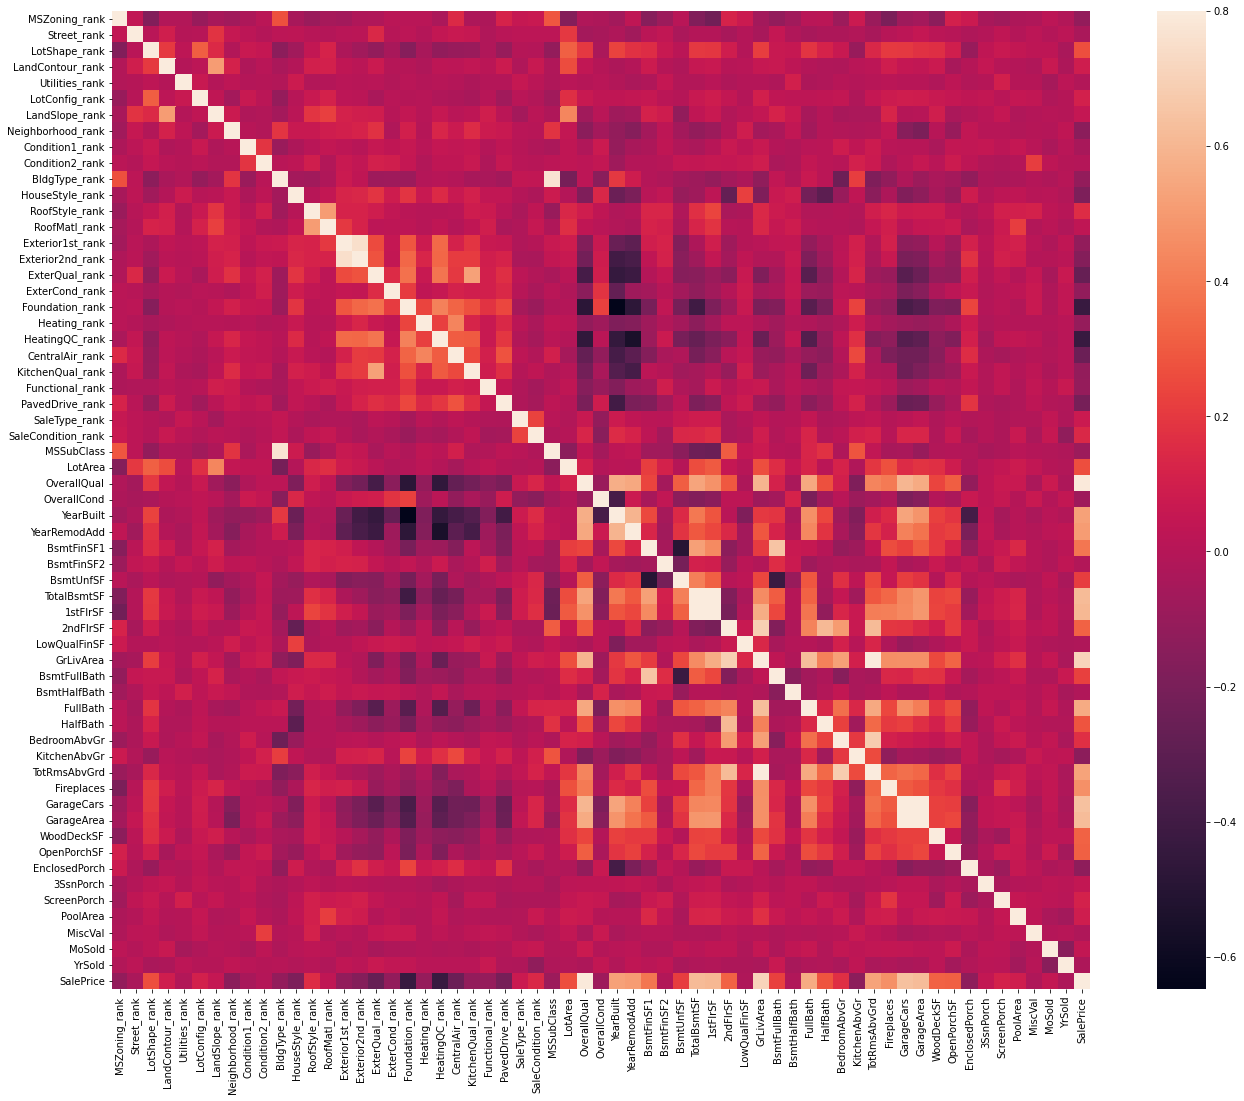

In [73]:
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [74]:
df_features = corrmat.sort_values(by=['SalePrice'])['SalePrice']
df_features[-40:]

YrSold               -0.028923
LowQualFinSF         -0.025606
MiscVal              -0.021190
BsmtHalfBath         -0.016844
Utilities_rank       -0.014314
BsmtFinSF2           -0.011378
Condition2_rank      -0.004833
RoofMatl_rank         0.035820
3SsnPorch             0.044584
MoSold                0.046432
LandSlope_rank        0.051152
SaleType_rank         0.072896
LandContour_rank      0.092009
PoolArea              0.092404
LotConfig_rank        0.109106
ScreenPorch           0.111447
SaleCondition_rank    0.142503
RoofStyle_rank        0.159332
BedroomAbvGr          0.168213
BsmtUnfSF             0.214479
BsmtFullBath          0.227122
LotArea               0.263843
LotShape_rank         0.267759
HalfBath              0.284108
OpenPorchSF           0.315856
2ndFlrSF              0.319334
WoodDeckSF            0.324413
BsmtFinSF1            0.386420
Fireplaces            0.466929
YearRemodAdd          0.507101
YearBuilt             0.522897
TotRmsAbvGrd          0.533723
FullBath

## Linear Regression

TODO:
- 전 처리된 dataset으로 regression
- Change distribution of the label

### Train test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# correlation이 높은 상위 15개 정도만 학습시켜보자
df_features[-16:-1].index.tolist()

['OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'Fireplaces',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [ ]:
x = df_processed[df_features[-16:-1].index.tolist()]
y = df_processed['SalePrice']

In [ ]:
x.shape, y.shape

((1460, 15), (1460,))

In [ ]:
# df_processed 통채로 학습시키지 않고 분할 학습시켜보자
# 90% 학습시키고 10% 검증데이터로 활용
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((1314, 15), (146, 15))

In [ ]:
y_train.shape, y_test.shape

((1314,), (146,))

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# hyperparameter 쓰지 않고 default 로만 학습 시켜보자
model = Lasso()

In [ ]:
model = model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.095e+11, tolerance: 7.873e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# 훈련된 모델이 x_test값을 예측치로 집어넣어 본다
pred = model.predict(x_test)

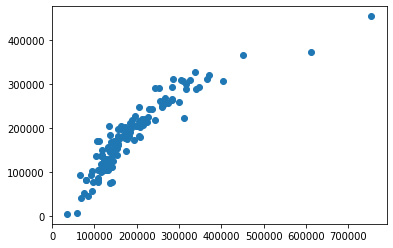

In [ ]:
# y_test : 실제 정답과 예측치를 비교해본다
plt.scatter(y_test, pred)

### Evaluation

In [ ]:
#sklearn 에 다양한 metric 함수들이 있음
from sklearn import metrics

In [ ]:
# 정량화를 하기 위한 간단한 evaluate function
def print_evaluate(true, predicted):
  mae = metrics.mean_absolute_error(true, predicted)
  mse = metrics.mean_squared_error(true, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true, predicted)
  print('MAE: ', mae)
  print('MSE: ', mse)
  print('RMSE: ', rmse)
  print('R2 SQAURE: ', r2_square)

In [ ]:
# print_evaluate(정답, 예측값)
print_evaluate(y_test, pred)

MAE:  23794.142695973376
MSE:  1754358902.586029
RMSE:  41885.06777583186
R2 SQAURE:  0.80798642166732


In [ ]:
# 값을 좀 더 가시적으로 보기 위해 시각화 하기
#[결과값, 예측값]
df_result = pd.concat([y_test.reset_index(), pd.DataFrame(pred)], axis=1)

df_result

,index,SalePrice,0
0,892,154500,155918.012756
1,1105,325000,308343.211554
2,413,115000,109925.280172
3,522,159000,176015.061794
4,1036,315500,299781.721455
...,...,...,...
141,526,132000,119118.906907
142,101,178000,185965.751837
143,1092,136500,183903.421321
144,411,145000,140071.706967


### Label transformation

- Labeling 조절 해 줄 필요가 있음
- 분포가 정규분포를 따르면 좋음 -> fitting이 잘 됨
- ouput의 범위가 크면 model이 예측하기 어려워짐

In [ ]:
import scipy.stats as st 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


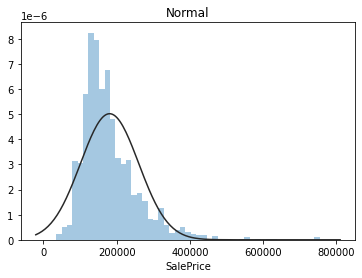

In [ ]:
#label이 정규분포를 따르는지 먼저 확인
plt.figure(2)
plt.title('Normal')
sns.distplot(df_processed['SalePrice'], kde=False, fit=st.norm)

- 분포가 완전 정규분포와 일치하는 것은 아님
-> 여러 transformation을 사용하여 정규분포로 만들어보자

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


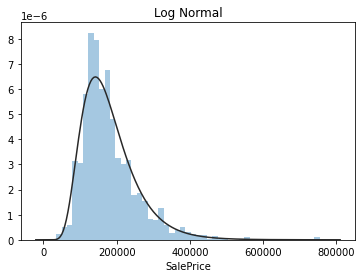

In [ ]:
# log norm을 취해보자
plt.figure(3)
plt.title('Log Normal')
sns.distplot(df_processed['SalePrice'], kde=False, fit=st.lognorm)

log norm을 취했을 때 그래프가 잘 맞는 것에서 아이디어를 얻어 결과값, 즉 y 값에 log를 취한 값을 넣어 정규분포를 따르는지 확인해보자

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


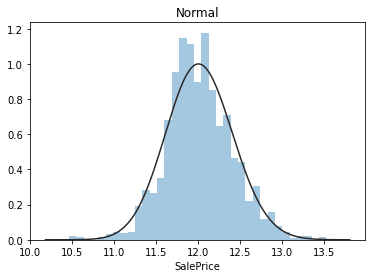

In [ ]:
plt.figure(3)
plt.title('Normal')
sns.distplot(np.log(df_processed['SalePrice']), kde=False, fit=st.lognorm)

- 값이 훨씬 이상적인 모습으로 잘 나왔음을 확인할 수 있다

-> Log 로 transform을 해서 fitting을 해보도록 하자.

In [ ]:
# x값은 그대로 두고 y 값은 log를 취해서 학습시켜보자
model = Lasso()
model = model.fit(x_train, np.log(y_train))

In [ ]:
#log를 취한 y값을 원래대로 복구 시키기 위해서 exp를 취해주자
pred = np.exp(model.predict(x_test))

In [ ]:
# 학습시킨 모델의 결과값을 확인해보자
print_evaluate(y_test, pred)

MAE:  21617.328358371098
MSE:  1345501205.1928196
RMSE:  36681.07420990857
R2 SQAURE:  0.8527356627659387


## MLP
- Multiple Layer Percetron

### Data Processing
- Data Preprocessing

In [ ]:
df_processed

,MSZoning_rank,Street_rank,LotShape_rank,LandContour_rank,Utilities_rank,LotConfig_rank,LandSlope_rank,Neighborhood_rank,Condition1_rank,Condition2_rank,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,1,1,1,1,1,1,1,1,1,...,0,61,0,0,0,0,0,2,2008,208500
1,1,1,1,1,1,2,1,2,2,1,...,298,0,0,0,0,0,0,5,2007,181500
2,1,1,2,1,1,1,1,1,1,1,...,0,42,0,0,0,0,0,9,2008,223500
3,1,1,2,1,1,3,1,3,1,1,...,0,35,272,0,0,0,0,2,2006,140000
4,1,1,2,1,1,2,1,4,1,1,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,1,1,1,1,1,18,1,1,...,0,40,0,0,0,0,0,8,2007,175000
1456,1,1,1,1,1,1,1,7,1,1,...,349,0,0,0,0,0,0,2,2010,210000
1457,1,1,1,1,1,1,1,3,1,1,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1,1,1,1,1,1,1,12,1,1,...,366,0,112,0,0,0,0,4,2010,142125


numeric 형태의 변수들은 숫자가 클수록 학습하는데 시간이 걸리고 오차를 많이 발생시킬 여지가 있다. => normalize 시킬 필요가 있음

feature 별로 scale을 맞추는 작업을 해보자

In [ ]:
# feature를 30개 정도 가져오자
x = df_processed[df_features[-31:-1].index.tolist()]
y = df_processed['SalePrice']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [98]:
#feature 별로 normarlize 하기 위해 최대값과 최솟값을 이용하기로 하자
from sklearn.preprocessing import MinMaxScaler

normalize방법 중 하나
> x = (x - min(col)) / (max(col) - min(col))
- min = 0, max = 1 이므로  0-1 사이의 값으로 바뀜

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
x_train.shape

(1314, 30)

In [ ]:
# min_max_scaler.fit -> col 별로 최대최소를 저장하게 됨
min_max_scaler.fit(x_train)

MinMaxScaler()

### x값 scaling

In [ ]:
#scale을 fitting한 최대최소로 바꿔준다
scaled_x_train = min_max_scaler.transform(x_train)
scaled_x_test = min_max_scaler.transform(x_test)

### y값 scaling

In [ ]:
y_min_max_scaler = MinMaxScaler()

In [ ]:
y_train.shape

(1314,)

x_train에 MinMaxScaler를 바로 적용할 수 있는 이유는 x_train.shape=(1314, 30) 이기 때문.
반면 y_train.shape은 그냥 (1314, )임.
-> 형태가 맞지 않아서 보정해줘야 함

In [ ]:
y_min_max_scaler.fit(np.array(y_train).reshape(-1,1))

MinMaxScaler()

In [ ]:
scaled_y_train = y_min_max_scaler.transform(np.array(y_train).reshape(-1,1))

In [ ]:
scaled_y_test = y_min_max_scaler.transform(np.array(y_test).reshape(-1,1))

### x, y 값 확인

In [ ]:
scaled_x_train.shape, scaled_y_train.shape

((1314, 30), (1314, 1))

In [ ]:
scaled_x_test.shape, scaled_y_test.shape

((146, 30), (146, 1))

### MLP model architecture

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

- 간단한 모델을 만들어보자

In [ ]:
model = keras.Sequential(
    [
        #input값으로 scaled_x_train.shape[-1]=30 넣어준다
        keras.Input(shape=scaled_x_train.shape[-1]), 
        #outputsize = 1 이므로 Dense(1)
        #regularizer: kernel_regularizer=tf.keras.regularizers.l1(1.0) ---> overfitting방지
        #(L1)ㅣ1, (L2)l2 이렇게 쓸 수 있음. 여기서 ㅣ1(1.0) -> lamda=1.0
        layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.01))
    ]
) #Lasso와 거의 동일한 형태의 모델
#Fully connected layer model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


parameter = 31 : weight의 수가 30 이므로 bias의 수는 1

In [ ]:
#loss는 정의하기 나름인데 강의에서는 mse를 사용함
model.compile(loss="mse", optimizer="adam")

In [ ]:
model.fit(scaled_x_train, scaled_y_train, batch_size=1, epochs=100)

Epoch 1/100
1314/1314 [==============================] - 2s 1ms/step - loss: 0.0091
Epoch 2/100
1314/1314 [==============================] - 2s 1ms/step - loss: 0.0092
Epoch 3/100
1314/1314 [==============================] - 2s 1ms/step - loss: 0.0092
Epoch 4/100
1314/1314 [==============================] - 2s 1ms/step - loss: 0.0092
Epoch 5/100
1314/1314 [==============================] - 2s 1ms/step - loss: 0.0091
Epoch 6/100
1314/1314 [==============================] - 2s 1ms/step - loss: 0.0092
Epoch 7/100
1314/1314 [==============================] - 2s 1ms/step - loss: 0.0092
Epoch 8/100
1314/1314 [==============================] - 2s 1ms/step - loss: 0.0092
Epoch 9/100
1314/1314 [==============================] - 2s 1ms/step - loss: 0.0093
Epoch 10/100
1314/1314 [==============================] - 2s 1ms/step - loss: 0.0092
Epoch 11/100
1314/1314 [==============================] - 2s 1ms/step - loss: 0.0092
Epoch 12/100
1314/1314 [==============================] - 2s 1ms/step - lo

KeyboardInterrupt: ignored

In [ ]:
#평가는 scaled 된 값으로 하기 때문에 이후엔 다시 원래의 값으로 돌려줘야 됨
scaled_pred = model.predict(scaled_x_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
#다시 원래의 값으로 돌려주기 : inverse_transform
pred_y = y_min_max_scaler.inverse_transform(scaled_pred)

In [ ]:
print_evaluate(y_test, pred_y)

MAE:  37208.75700984589
MSE:  4023885354.318993
RMSE:  63434.10245537484
R2 SQAURE:  0.5595880497745728


### Add layers

- 할수 있는 것
> layer depth, feature size

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=scaled_x_train.shape[-1]),
        layers.Dense(96, activation='relu'), # overfitting?
        layers.Dense(48, activation='relu'),
        layers.Dense(1)
    ]
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 96)                2976      
                                                                 
 dense_6 (Dense)             (None, 48)                4656      
                                                                 
 dense_7 (Dense)             (None, 1)                 49        
                                                                 
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


input size = 30인데 반해 학습데이터가 과하다 -> overfitting 문제 발생할 수 있음

In [ ]:
model.compile(loss="mse", optimizer="adam")

In [ ]:
# validation_split으로 학습이 잘 되고 있는지를 확인할 수 있다 -> overfitting 여부 확인
# validation_split- default=0, 예제에서는 5%만 떼서 vali로 설정해주었다
model.fit(scaled_x_train, scaled_y_train, batch_size=2, epochs=100, validation_split=0.05)

Epoch 1/100
624/624 [==============================] - 2s 2ms/step - loss: 0.0046 - val_loss: 0.0064
Epoch 2/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 3/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 4/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 5/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 6/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 8/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 9/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 10/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0018 - val_lo

KeyboardInterrupt: ignored

- loss가 lasso 유사 모델보다 적다
- loss가 적다고 좋은게 아님 -> overfitting 문제가 있을 수 있으므로 validation loss를 같이 확인해줘야 함

- loss는 계속 줄어드는데 validation_loss가 증가하거나 일정한 값일 경우 overfitting이 일어나고 있다고 추측할 수 있으므로 학습을 중단시켜야 한다.

In [ ]:
scaled_pred = model.predict(scaled_x_test)
pred_y = y_min_max_scaler.inverse_transform(scaled_pred)

5/5 [==============================] - 0s 3ms/step


In [ ]:
print_evaluate(y_test, pred_y)

MAE:  19732.531383775684
MSE:  1103770805.371773
RMSE:  33223.046298793444
R2 SQAURE:  0.8791929167480113


현재까지 학습한 모델들 중에서 가장 좋은 결과를 보인다

### Early-Stopping

tf.keras.callbacks.EarlyStoppping
> https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# model = keras.Sequential([
#     keras.Input(scaled_x_train.shape[-1]),
#     layers.Dense(8, kernel_regularizer=tf.keras.regularizers.l1(0.3), activation='relu'),
#     layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.3))
# ])
# 먼저 썼던 모델 다시 씀
model = keras.Sequential(
    [
        keras.Input(shape=scaled_x_train.shape[-1]),
        layers.Dense(96, activation='relu'), # overfitting?
        layers.Dense(48, activation='relu'),
        layers.Dense(1)
    ]
)

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
#patiece = 7 : 7회 뒤에도 값이 갱신되지 않으면 멈추겠다는 뜻

In [ ]:
model.fit(scaled_x_train, scaled_y_train, batch_size=2, epochs=100, validation_split=0.05, callbacks=[early_stopping_callback])

Epoch 1/100
624/624 [==============================] - 2s 3ms/step - loss: 0.0015 - val_loss: 8.0145e-04
Epoch 2/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0013 - val_loss: 8.1439e-04
Epoch 4/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0014 - val_loss: 9.6934e-04
Epoch 6/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 7/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0012 - val_loss: 7.9223e-04
Epoch 8/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 9/100
624/624 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
624/624 [==============================] - 1s 2ms/step - loss:

Early stopping 하니까 더이상 학습 이득이 없다고 판단한 지점에서 학습이 멈추게 된다.

In [ ]:
scaled_pred = model.predict(scaled_x_test)
pred_y = y_min_max_scaler.inverse_transform(scaled_pred)

5/5 [==============================] - 0s 2ms/step


In [ ]:
print_evaluate(y_test, pred_y)

MAE:  18506.642765410958
MSE:  824583881.2303977
RMSE:  28715.568621052895
R2 SQAURE:  0.9097497658904866


## K-fold Cross Validation

### Train test Split

In [75]:
# corr이 높은 상위 30개 정도만 학습 시키자
NUM_FEATURES = 30

In [76]:
from sklearn.model_selection import train_test_split

In [78]:
x = df_processed[df_features[-NUM_FEATURES-1:-1].index.tolist()]
y = df_processed['SalePrice']

In [79]:
x.shape, y.shape

((1460, 30), (1460,))

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [81]:
x_train.shape, y_train.shape

((1314, 30), (1314,))

In [82]:
x_test.shape,y_test.shape 

((146, 30), (146,))

### Linear Regression

In [83]:
from sklearn.linear_model import Lasso

In [84]:
model = Lasso()
model = model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.630e+11, tolerance: 7.873e+08
  model = cd_fast.enet_coordinate_descent(


In [85]:
pred = model.predict(x_test)

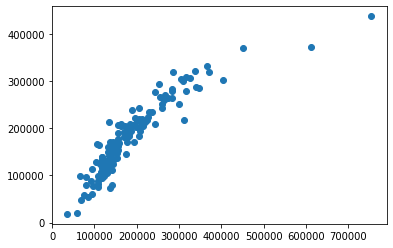

In [86]:
plt.scatter(y_test, pred)

### Evaluation

In [87]:
from sklearn import metrics

In [88]:
def print_evaluate(true, predicted):
  mae = metrics.mean_absolute_error(true, predicted)
  mse = metrics.mean_squared_error(true, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true, predicted)
  print('MAE: ', mae)
  print('MSE: ', mse)
  print('RMSE: ', rmse)
  print('R2 SQAURE: ', r2_square)

In [89]:
print_evaluate(y_test, pred)

MAE:  23899.157521884084
MSE:  1828691882.170764
RMSE:  42763.207108105955
R2 SQAURE:  0.799850719572865


In [91]:
df_results = pd.concat([
    y_test.reset_index(), pd.DataFrame(pred)], axis=1
)

In [92]:
df_results

,index,SalePrice,0
0,892,154500,148455.097258
1,1105,325000,306906.137040
2,413,115000,105274.806751
3,522,159000,168022.610310
4,1036,315500,308094.345944
...,...,...,...
141,526,132000,117466.083458
142,101,178000,181631.707511
143,1092,136500,171538.826179
144,411,145000,146504.106446


### K-fold Cross Validiation
- dataset이 작기 때문에 test_size를 어떻게 다루는게 좋을지 알아보자

In [93]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# 10%를 추출하되 K=10 즉, 10번에 걸쳐서 추출할 수 있도록 하자.
K=10
data_size = int(len(x)/K)

In [94]:
data_size

146

sklearn에서 KFold를 제공함

In [95]:
from sklearn.model_selection import KFold

In [96]:
kf = KFold(n_splits=K)

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
# data preprocessing
x_min_max_scaler = MinMaxScaler()
x_min_max_scaler.fit(x)
scaled_x = x_min_max_scaler.transform(x)

y_min_max_scaler = MinMaxScaler()
y_min_max_scaler.fit(np.array(y).reshape(-1, 1))
scaled_y = y_min_max_scaler.transform(np.array(y).reshape(-1, 1))

In [101]:
scaled_x.shape, scaled_y.shape

((1460, 30), (1460, 1))

In [103]:
# 최종적으로는 rmse를 모아서 평균을 내줘야 함
rmses = []


# KFold : kf.split(scaled_x) -> 자동으로 index 추출해줌
for train_index, test_index in kf.split(scaled_x):
  # print("TRAIN : ", train_index, "TEST : ", test_index)

  x_train, x_test = scaled_x[train_index], scaled_x[test_index]
  y_train, y_test = scaled_y[train_index], scaled_y[test_index]

  # print(x_train.shape, x_test.shape)
  # print(y_train.shape, y_test.shape)

  # training
  model = Lasso()
  model = model.fit(x_train, y_train)

  # evaluation
  pred = model.predict(x_test).reshape((-1,1))
  pred = y_min_max_scaler.inverse_transform(pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, pred)) #rmse : Root Mean Squared Error

  print(rmse)
  print("--------->")

  # break

  rmses.append(rmse)


181632.6112898907
--------->
180027.94663797648
--------->
180696.21069777504
--------->
180689.21822073552
--------->
180332.03110818347
--------->
180697.65972653756
--------->
181755.2208892524
--------->
181831.19976882864
--------->
180042.74895388487
--------->
181505.08382085158
--------->


- 10개의 평가 지표를 얻을 수 있다.

In [104]:
rmses

[181632.6112898907,
 180027.94663797648,
 180696.21069777504,
 180689.21822073552,
 180332.03110818347,
 180697.65972653756,
 181755.2208892524,
 181831.19976882864,
 180042.74895388487,
 181505.08382085158]

In [105]:
# rmses들의 평균을 낸다 -> 최종적으로 믿을수 있는 평가 지표로 생각할 수 있다.
np.mean(rmses)

180920.99311139164

## Regression Model with Decision Tree

#### Decision Tree
 - Decision Tree Regression

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
# K값은 이전에 사용했던 K=10을 이용한다

rmses = []

for train_index, test_index in kf.split(scaled_x):
  # print("TRAIN : ", train_index, "TEST : ", test_index)

  x_train, x_test = scaled_x[train_index], scaled_x[test_index]
  y_train, y_test = scaled_y[train_index], scaled_y[test_index]

  # print(x_train.shape, x_test.shape)
  # print(y_train.shape, y_test.shape)

  # training
  model = DecisionTreeRegressor(random_state=0,)
  model = model.fit(x_train, y_train)

  # evaluation
  pred = model.predict(x_test).reshape((-1,1))
  pred = y_min_max_scaler.inverse_transform(pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, pred)) #rmse : Root Mean Squared Error

  print(rmse)
  print("---------")

  rmses.append(rmse)

190257.2595443588
---------
206590.47574643127
---------
205634.5705770017
---------
202455.43094697924
---------
206476.17298975162
---------
192288.30973504967
---------
189057.02508195955
---------
189032.5035088884
---------
208924.38346659337
---------
190102.98215084083
---------


In [108]:
print("Avaerage rmse: ", np.mean(rmses))

Avaerage rmse:  198081.91137478544


Lasso 모델에 비해 약간 아쉬운 결과를 얻었다.

## Ensemble

### Random Forest
- Decision Tree 개선
- Ensemble

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
# K값은 이전에 사용했던 K=10을 이용한다

rmses = []

for train_index, test_index in kf.split(scaled_x):
  # print("TRAIN : ", train_index, "TEST : ", test_index)

  x_train, x_test = scaled_x[train_index], scaled_x[test_index]
  y_train, y_test = scaled_y[train_index], scaled_y[test_index]

  # print(x_train.shape, x_test.shape)
  # print(y_train.shape, y_test.shape)

  # training
  model = RandomForestRegressor(random_state=0,)
  model = model.fit(x_train, y_train)
  # RandomForest에서 가장 중요한 건 n_estimators=[number]<- Tree의 개수를 얼마로 할 것인가
  # n_estimators=100 : Default

  # evaluation
  pred = model.predict(x_test).reshape((-1,1))
  pred = y_min_max_scaler.inverse_transform(pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, pred)) #rmse : Root Mean Squared Error

  print(rmse)
  print("---------")

  rmses.append(rmse)

print("Average rmse : ", np.mean(rmses))

<ipython-input-112-057e8ced2e86>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


188296.2582533917
---------


<ipython-input-112-057e8ced2e86>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


198993.25028423624
---------


<ipython-input-112-057e8ced2e86>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


196654.89723774584
---------


<ipython-input-112-057e8ced2e86>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


204357.4733537855
---------


<ipython-input-112-057e8ced2e86>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


200562.88012403564
---------


<ipython-input-112-057e8ced2e86>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


189146.5363774147
---------


<ipython-input-112-057e8ced2e86>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


187060.08678220562
---------


<ipython-input-112-057e8ced2e86>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


184301.28566005206
---------


<ipython-input-112-057e8ced2e86>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


202759.67266679808
---------


<ipython-input-112-057e8ced2e86>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


190919.34759815072
---------
Average rmse :  194305.1688337816


역시 Lasso에 비해서는 약간 아쉬운 결과를 보여준다 </br></br>
NOTE)
- Tree형 모델은 Regression에 약하다.
- Decision Tree나 Random Forest의 경우 Classification에 더 적합하다.

### Boosting

#### AdaBoost

In [113]:
from sklearn.ensemble import AdaBoostRegressor

In [114]:
# K-Fold Cross Validation Frame

rmses = []

for train_index, test_index in kf.split(scaled_x):
  # print("TRAIN : ", train_index, "TEST : ", test_index)

  x_train, x_test = scaled_x[train_index], scaled_x[test_index]
  y_train, y_test = scaled_y[train_index], scaled_y[test_index]

  # print(x_train.shape, x_test.shape)
  # print(y_train.shape, y_test.shape)

  # training
  model = AdaBoostRegressor(random_state=0,)
  model = model.fit(x_train, y_train)


  # evaluation
  pred = model.predict(x_test).reshape((-1,1))
  pred = y_min_max_scaler.inverse_transform(pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, pred)) #rmse : Root Mean Squared Error

  print(rmse)
  print("---------")

  rmses.append(rmse)

print("Average rmse : ", np.mean(rmses))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


196274.57881322003
---------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


200175.7712245431
---------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


203109.01740714387
---------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


207549.91681903644
---------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


209043.50607817541
---------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


194390.3255260536
---------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


190739.04979546237
---------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


187683.76815438917
---------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


213067.950171168
---------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


200498.31321385878
---------
Average rmse :  200253.2197203051


- 아무래도 data preprocessiong이 정교하지 않아서 rmse가 더 좋아지지는 않음

#### XGBoost

In [115]:
# XGBoost는 xgboost에 있다.
from xgboost import XGBRegressor

colab의 경우 xgboost를 많이 활용하기 때문에 그냥 import 할 수 있지만 일반적으로는 사용하기 위해 xgboost를 설치해야 한다.

In [117]:
# 참고 : xgboost 설치 여부 확인해보기
# pip install xgboost

In [118]:
rmses = []

for train_index, test_index in kf.split(scaled_x):
  # print("TRAIN : ", train_index, "TEST : ", test_index)

  x_train, x_test = scaled_x[train_index], scaled_x[test_index]
  y_train, y_test = scaled_y[train_index], scaled_y[test_index]

  # print(x_train.shape, x_test.shape)
  # print(y_train.shape, y_test.shape)

  # training
  model = XGBRegressor(n_estimators=100,)
  model = model.fit(x_train, y_train)

  # evaluation
  pred = model.predict(x_test).reshape((-1,1))
  pred = y_min_max_scaler.inverse_transform(pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, pred)) #rmse : Root Mean Squared Error

  print(rmse)
  print("---------")

  rmses.append(rmse)

print("Average rmse : ", np.mean(rmses))

[06:11:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
188881.40294138063
---------
[06:11:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
199879.9121726611
---------
[06:11:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
197412.713914698
---------
[06:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
205702.62385019913
---------
[06:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
200828.05615437523
---------
[06:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
189503.72844541303
---------
[06:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: